## 2D Convolutions with PyTorch

Click [here](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) for the full documentation of PyTorch's 2D Convolutional layer.

Click [here](https://setosa.io/ev/image-kernels/) for traditional image kernels.

Click [here](https://poloclub.github.io/cnn-explainer/) for the interactive CNN explainer.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

In [2]:
import pickle
import gzip

with gzip.open('mnist.pkl.gz', 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')
    
x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train, y_train, x_valid, y_valid))
x_train = x_train.reshape((-1, 1, 28, 28))
x_valid = x_valid.reshape((-1, 1, 28, 28)) # shape is (batch, channels, height, width)

In [3]:
x_train.shape

torch.Size([50000, 1, 28, 28])

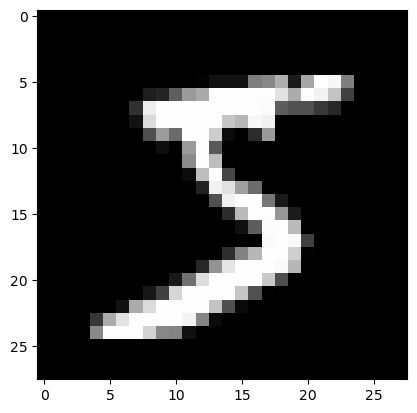

torch.Size([1, 1, 28, 28])

In [4]:
xb = x_train[0:1]
plt.imshow(xb.squeeze().numpy(), cmap='gray')
plt.show()
xb.shape

In [5]:
# Create 2d conv layer
in_channels = 1
out_channels = 1
kernel_size = 3
my_conv2d = nn.Conv2d(in_channels, out_channels, kernel_size, bias=False) # stride=1, padding=0, padding_mode='zeros', dilation=1
 
for p in my_conv2d.parameters():
    print(p.shape)
    print(p)

torch.Size([1, 1, 3, 3])
Parameter containing:
tensor([[[[ 0.0932,  0.2805,  0.2438],
          [ 0.0631, -0.1779,  0.2671],
          [ 0.2238, -0.0474,  0.2389]]]], requires_grad=True)


![image.png](in-out-shapes-conv2d.png)

In [6]:
height = 28
padding = 0
dilation = 1
kernel_size = 3
stride = 1

H_out = np.floor((height + 2*padding - dilation*(kernel_size - 1) - 1)/stride + 1)
print(f'H_out: {H_out}')

H_out: 26.0


torch.Size([1, 9, 26, 26])


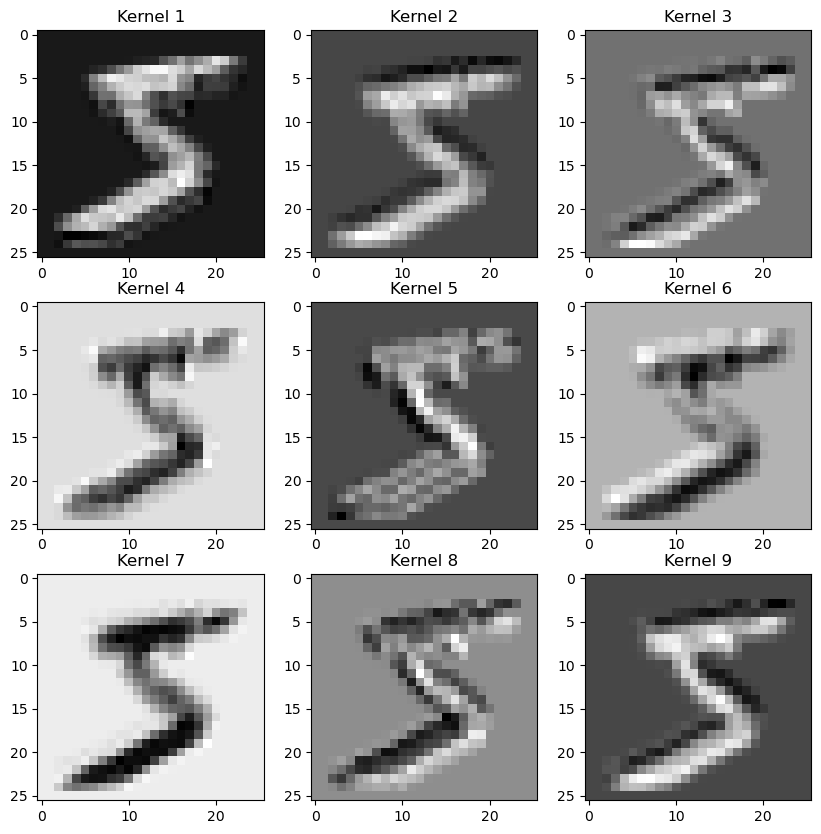

In [7]:
# Initialize random kernels
my_conv2d = nn.Conv2d(in_channels=in_channels, out_channels=9, kernel_size=3, bias=False) # images are smaller since we don't pad.
out = my_conv2d(xb)
print(out.shape)

fig  = plt.figure(figsize=(10, 10))
rows = cols = 3
for i in range(cols*rows):
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(out[:, i, :, :].squeeze().detach().numpy(), cmap='gray')
    plt.title(f'Kernel {i+1}')
plt.show()

## VGG-16

Notice the pattern of Conv-Relu-Pool.

![image.png](vgg-diagram.png)

torch.Size([1, 9, 26, 26])


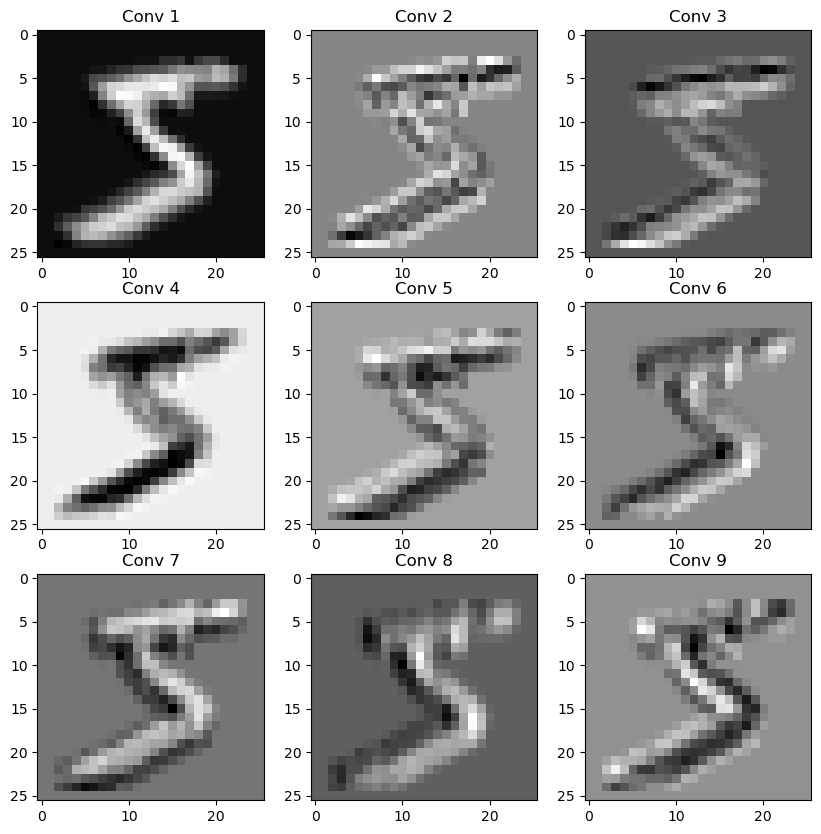

torch.Size([1, 9, 26, 26])


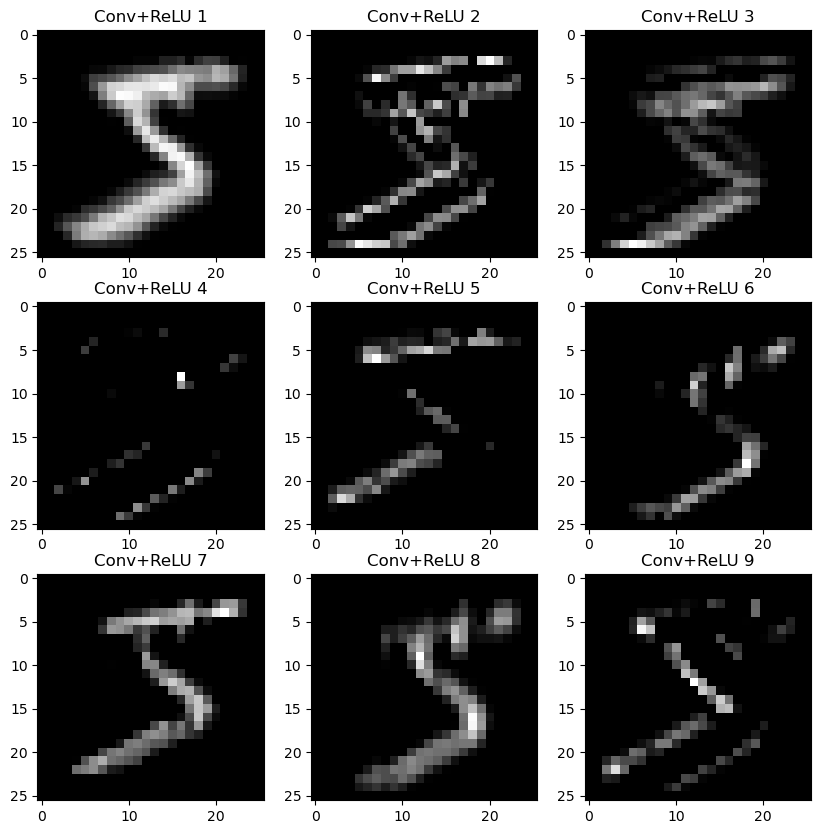

In [9]:
my_conv2d = nn.Conv2d(in_channels=in_channels, out_channels=9, kernel_size=3, bias=False) # images are smaller since we don't pad.
my_relu = nn.ReLU()
out1 = my_conv2d(xb)
out2 = my_relu(out1)

print(out1.shape)
fig  = plt.figure(figsize=(10, 10))
rows = cols = 3
for i in range(cols*rows):
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(out1[:, i, :, :].squeeze().detach().numpy(), cmap='gray')
    plt.title(f'Conv {i+1}')
plt.show()

print(out2.shape)
fig  = plt.figure(figsize=(10, 10))
rows = cols = 3
for i in range(cols*rows):
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(out2[:, i, :, :].squeeze().detach().numpy(), cmap='gray')
    plt.title(f'Conv+ReLU {i+1}')
plt.show()

torch.Size([1, 9, 24, 24])


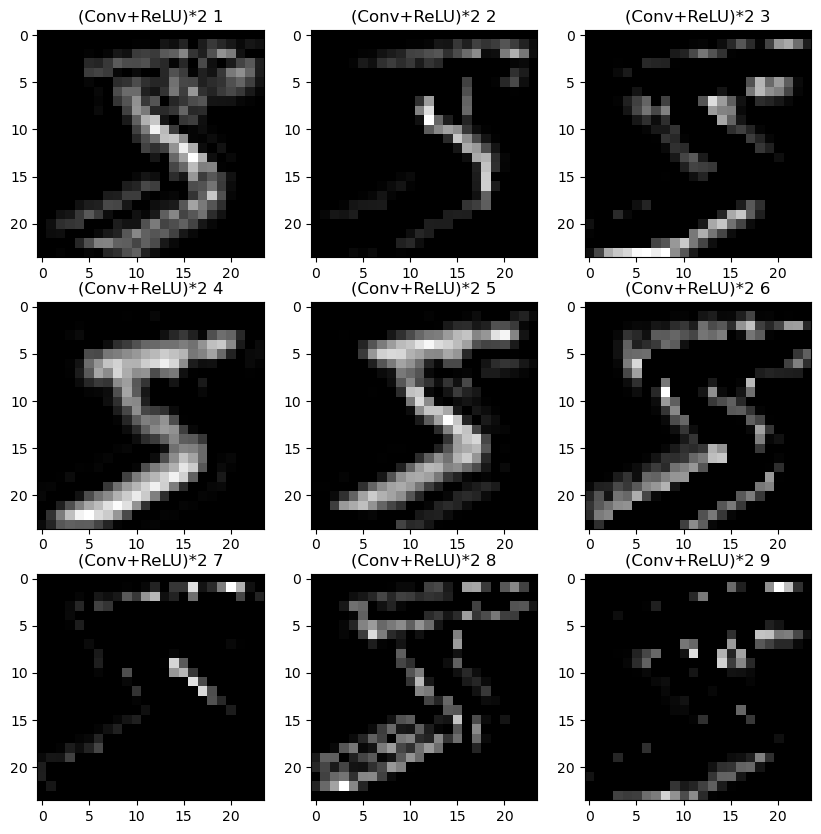

In [10]:
conv2d_1 = nn.Conv2d(in_channels=in_channels, out_channels=9, kernel_size=3, bias=False) # images are smaller since we don't pad.
conv2d_2 = nn.Conv2d(in_channels=9, out_channels=9, kernel_size=3, bias=False) # images are smaller since we don't pad.
my_relu = nn.ReLU()
out = my_relu(conv2d_1(xb))
out = my_relu(conv2d_2(out))
print(out.shape)

fig  = plt.figure(figsize=(10, 10))
rows = cols = 3
for i in range(cols*rows):
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(out[:, i, :, :].squeeze().detach().numpy(), cmap='gray')
    plt.title(f'(Conv+ReLU)*2 {i+1}')
plt.show()

### MaxPooling Layers

torch.Size([1, 1, 26, 26])


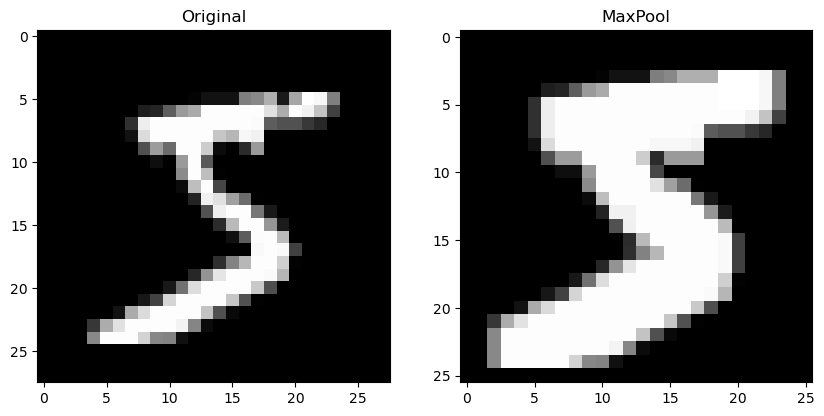

In [11]:
my_pool2d = nn.MaxPool2d(kernel_size=3, stride=1)
out = my_pool2d(xb)
print(out.shape)

fig  = plt.figure(figsize=(10, 10))

fig.add_subplot(1, 2, 1)
plt.imshow(xb.squeeze().detach().numpy(), cmap='gray')
plt.title(f'Original')

fig.add_subplot(1, 2, 2)
plt.imshow(out.squeeze().detach().numpy(), cmap='gray')
plt.title(f'MaxPool')

plt.show()

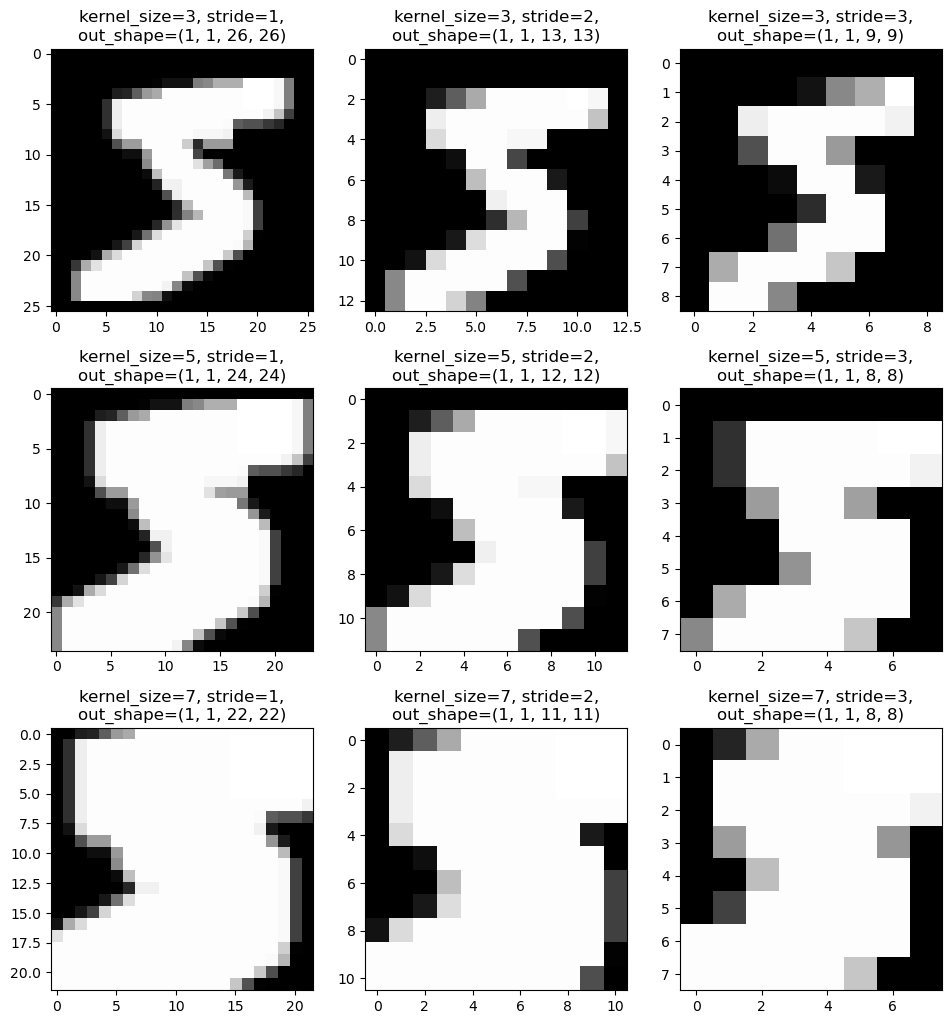

In [12]:
from itertools import product

fig  = plt.figure(figsize=(11.5, 12.5))

for i, params in enumerate(product([3, 5, 7], [1, 2, 3])):
    
    my_pool2d = nn.MaxPool2d(kernel_size=params[0], stride=params[1])
    out = my_pool2d(xb)
    
    fig.add_subplot(3, 3, i+1)
    plt.imshow(out.squeeze().detach().numpy(), cmap='gray')
    plt.title(f'kernel_size={params[0]}, stride={params[1]},\nout_shape={out.detach().numpy().shape}')
plt.show()

torch.Size([1, 9, 24, 24])


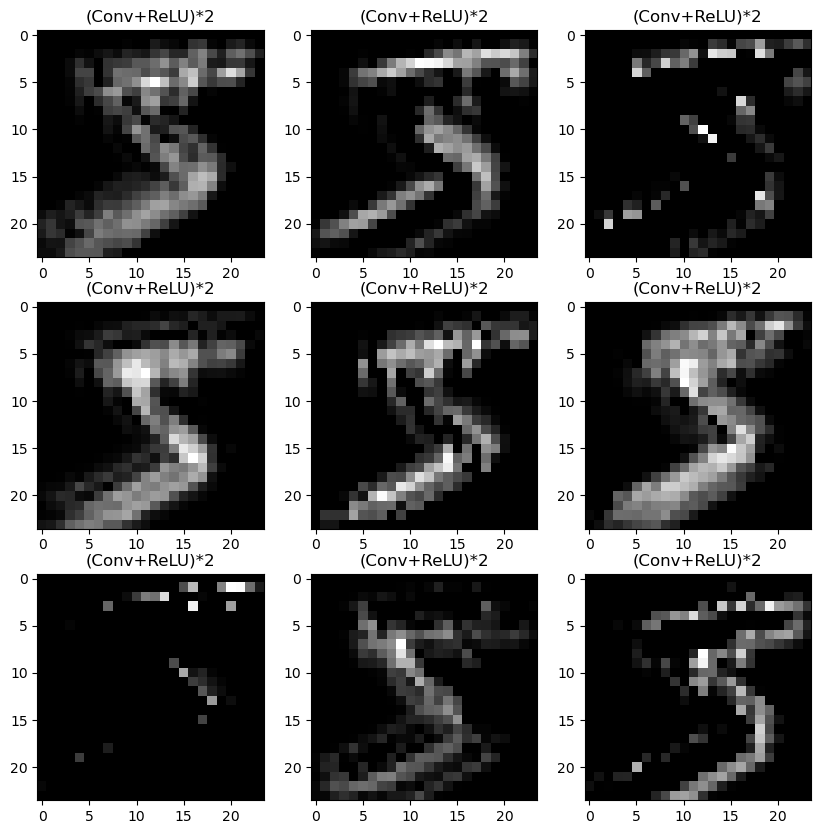

torch.Size([1, 9, 23, 23])


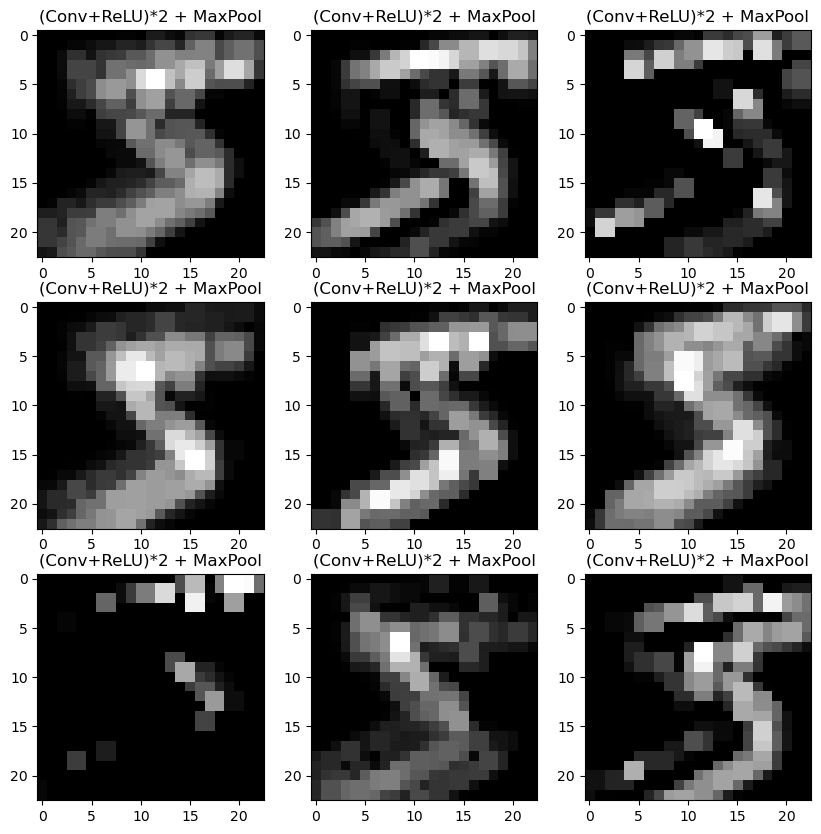

In [13]:
conv2d_1 = nn.Conv2d(in_channels=in_channels, out_channels=9, kernel_size=3, bias=False) # images are smaller since we don't pad.
conv2d_2 = nn.Conv2d(in_channels=9, out_channels=9, kernel_size=3, bias=False) # images are smaller since we don't pad.
my_relu = nn.ReLU()
my_pool = nn.MaxPool2d(kernel_size=2, stride=1)
out = my_relu(conv2d_1(xb))
out_1 = my_relu(conv2d_2(out))
out_2 = my_pool(out_1)
print(out_1.shape)

fig  = plt.figure(figsize=(10, 10))
rows = cols = 3
for i in range(cols*rows):
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(out_1[:, i, :, :].squeeze().detach().numpy(), cmap='gray')
    plt.title(f'(Conv+ReLU)*2')
plt.show()

print(out_2.shape)
fig  = plt.figure(figsize=(10, 10))
rows = cols = 3
for i in range(cols*rows):
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(out_2[:, i, :, :].squeeze().detach().numpy(), cmap='gray')
    plt.title(f'(Conv+ReLU)*2 + MaxPool')
plt.show()